# Importing the required libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import joblib as jb
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Load dataset

In [35]:
df=pd.read_csv(r"E:\AI&ML\ml datasets\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Visualization

In [36]:
print(df.count())
df.isna().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
df.describe() # we found to do scaling in the target!

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
fig=px.histogram(df,
             x="age",
             marginal="box",
             nbins=47,
             title="distirbution of age")
fig.update_layout(bargap=0.1)
fig.show()

In [39]:
fig=px.histogram(df, #this graphs abbove and this are useful if they ask they data analysis stuff!!!!!
             x="bmi",
             marginal="box",
             color="smoker",
             facet_col='sex',
             title="distirbution of age")
fig.update_layout(bargap=0.1)
fig.show()

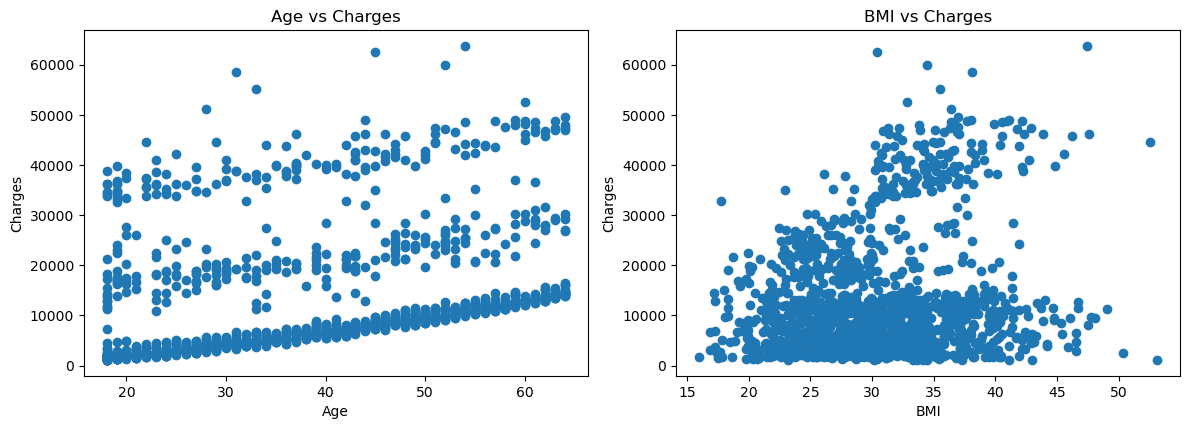

In [40]:
plt.figure(figsize=(12, 8))

# Plotting Age vs Charges
plt.subplot(2, 2, 1)
plt.scatter(df.age, df.charges)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Plotting BMI vs Charges
plt.subplot(2, 2, 2)
plt.scatter(df.bmi, df.charges)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')


# Display the plots
plt.tight_layout()
plt.show()
# from this 

### KFold technique used to overcome the varience in the data and helps in coming up  with the average model score and prediction of the model developed

In [41]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

### Labelencoder method used to convert the other data type into numeric type 

In [42]:
le=LabelEncoder()
df["region"]=le.fit_transform(df["region"])
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [43]:
#feature engineering techniques to overcome the outliers and make the model more efficient

In [44]:
fe=df.bmi.quantile(0.95)
df=df[df['bmi']<=fe]
fee=df.bmi.quantile(0.05)
df=df[df['bmi']>=fee]

#### Standard scalar helps in scaling the data from 0-1 so that data can be used efficiently

In [45]:
mms = StandardScaler()
mms.fit(df[['charges']])
df['charges'] = mms.transform(df[['charges']])
mms.fit(df[['age']])
df['age'] = mms.transform(df[['age']])

## data split for Training and Testing

In [46]:
x=df.drop(['sex','children','region','charges'],axis='columns')
x_train, x_test, y_train, y_test=tts(x,df.charges,test_size=0.25)

## Model implimentation

In [47]:
model=lr()
model.fit(x_train,y_train)

LinearRegression()

#### model performance in the training dataset

In [48]:
model.score(x_train,y_train)

0.7529881771970024

#### model prediction in test dataset

In [49]:
model.score(x_test,y_test)

0.7217113633501864

In [50]:
#save the model using joblib